In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, pdist

In [3]:
points = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
x_list = [1, 1002, 498, 6, 510, 503, 4, 1010, 1006, 502]
y_list = [6, 20, 651, 10, 622, 632, 9, 25, 30, 680]

data = pd.DataFrame({'point': points, 'x': x_list, 'y': y_list})
data = data.set_index('point')

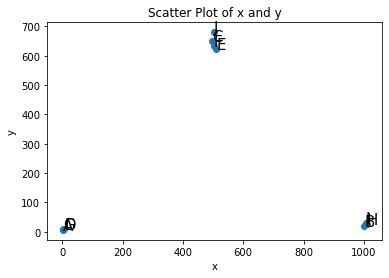

In [4]:
# plt.figure(figsize=(12,10))
plt.scatter(x_list, y_list)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x and y')
for l, x, y in zip(points, x_list, y_list):
    plt.annotate(l, (x, y), fontsize=15)
plt.show()

In [5]:
def dist_matrix(data):
    dist = pd.DataFrame(squareform(pdist(data[["x", "y"]]), "euclidean"),
                        columns=data.index.values,
                        index=data.index.values)


    # dist.values[tuple([np.arange(dist.shape[0])] * 2)] = np.nan
    return dist

In [6]:
def get_min(dist):
    min_dist = pd.DataFrame(
        pd.concat([dist.idxmin(), dist.min()], axis=1).rename(columns={
            0: 'closest',
            1: 'distance'
        }))
    d = min_dist['distance'].min()
    A = min_dist['distance'].idxmin()
    B = min_dist['closest'][A]
    return(A, B, d)

In [7]:
# print(get_min(dist))

In [8]:
def cluster(data, n_clusters=3):
    data = data.copy()
    clusters = []
    while len(data) > n_clusters:
        dist = dist_matrix(data)
        A, B, d = get_min(dist)
        print('Min:' ,A, B, d)
        data.drop(B, inplace=True)
        data.drop(A, inplace=True)
        data.add()
        print(data)
        # dist = dist.drop(B)
        # dist = dist.drop(A)

        clusters.append([A, B])
        print(clusters)
        return
cluster(data)

Min: A A 0.0


KeyError: "['A'] not found in axis"

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3,
                                         affinity='euclidean',
                                         linkage='complete')

label = agg_clustering.fit_predict(data)

data = data.assign(label=label)
print('Cluster 0:', ', '.join(list(data[label == 0].index.values)))
print('Cluster 1:', ', '.join(data[label == 1].index.values))
print('Cluster 2:', ', '.join(data[label == 2].index.values))

Cluster 0: C, E, F, J
Cluster 1: A, D, G
Cluster 2: B, H, I


In [ ]:
dist_matrix(data)

,A,B,C,D,E,F,G,H,I,J
A,0.000000,1001.097897,814.268997,6.403124,799.085102,802.421336,4.242641,1009.178874,1005.286526,839.807716
B,1001.097897,0.000000,807.574764,996.050200,777.475402,789.648656,998.060619,9.433981,10.770330,828.009662
C,814.268997,807.574764,0.000000,808.050122,31.384710,19.646883,810.061726,808.715030,802.312283,29.274562
D,6.403124,996.050200,808.050122,0.000000,792.817760,796.173976,2.236068,1004.112046,1000.199980,833.616219
E,799.085102,777.475402,31.384710,792.817760,0.000000,12.206556,794.861623,778.722672,772.321177,58.549125
F,802.421336,789.648656,19.646883,796.173976,12.206556,0.000000,798.204235,790.884315,784.482632,48.010416
G,4.242641,998.060619,810.061726,2.236068,794.861623,798.204235,0.000000,1006.127229,1002.220036,835.610555
H,1009.178874,9.433981,808.715030,1004.112046,778.722672,790.884315,1006.127229,0.000000,6.403124,828.908318
I,1005.286526,10.770330,802.312283,1000.199980,772.321177,784.482632,1002.220036,6.403124,0.000000,822.505927
J,839.807716,828.009662,29.274562,833.616219,58.549125,48.010416,835.610555,828.908318,822.505927,0.000000


In [ ]:
data.iloc[0]

x        1
y        6
label    1
Name: A, dtype: int64

In [ ]:
dists = squareform(dist_matrix(data))
# linkage_matrix = linkage(dists, "single")
linkage_matrix = linkage(dists, "complete")
points = data.index.values

trace = [[_] for _ in points]
clusters = [[_] for _ in points]
p = lambda i: trace[int(i)]
pp = lambda i: f"{''.join(p(i))}"
n = len(points)

for i, row in enumerate(linkage_matrix):
    A = int(row[0])
    B = int(row[1])
    CA = p(A)
    CB = p(B)
    new = [*CA, *CB]
    clusters = [elem for elem in clusters if set(elem) != set(CA) and set(elem) != set(CB)]
    # print(clusters)
    print(
        f"Iteration {i}: dist({pp(A)}, {pp(B)}) = {np.round(row[2], 3)} => {''.join(new)}"
    )
    trace.append(new)
    clusters.append(new)
    if(len(clusters)<=3):
        print('Final Clusters:',*[''.join(c) for c in clusters])
        break

# dendrogram(linkage_matrix, labels=points)
# plt.title("Single Link")
# plt.show()

Iteration 0: dist(D, G) = 2.236 => DG
Iteration 1: dist(A, DG) = 6.403 => ADG
Iteration 2: dist(H, I) = 6.403 => HI
Iteration 3: dist(B, HI) = 10.77 => BHI
Iteration 4: dist(E, F) = 12.207 => EF
Iteration 5: dist(C, J) = 29.275 => CJ
Iteration 6: dist(EF, CJ) = 58.549 => EFCJ
Final Clusters: ADG BHI EFCJ


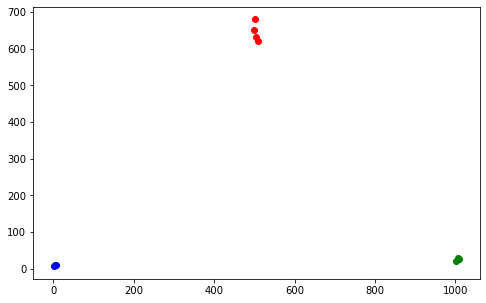

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(data[label == 0]['x'], data[label == 0]['y'], c='red')
plt.scatter(data[label == 1]['x'], data[label == 1]['y'], c='blue')
plt.scatter(data[label == 2]['x'], data[label == 2]['y'], c='green')
plt.show()

In [ ]:
# K Means


def k_means(data,
            init_centroids=[(500, 10), (200, 700), (800, 200)],
            n_clusters=3):
    def p(i):
        return (data.loc[i].x,
         data.loc[i].y) if isinstance(i, str) and i in points else i

    def d(p1, p2):

        A = p(p1)
        B = p(p2)
        return np.sqrt(np.sum((A[0] - B[0])**2 + (A[1] - B[1])**2))

    data = data.copy()
    centroids = [tuple(np.round(p(i), 2)) for i in init_centroids]

    print('Initial Centroids:', *[tuple(np.round(c,2)) for c in centroids])
    print()
    while True:
        clusters = [[] for _ in range(n_clusters)]

        for i, point in enumerate(points):
            dists = [d(point, c) for c in centroids]
            m = np.argmin(dists)
            # print(dists)
            print(
                f"{point}\t->\tC{m}\t d = {np.round(dists[m], 2)}"
            )
            clusters[m].append(point)

        print('Clusters:', *[''.join(c) for c in clusters])

        new_centroids = []
        for i, (c, m) in enumerate(zip(clusters, centroids)):
            # print('x', [data.loc[p].x for p in c])
            mx = np.mean([data.loc[p].x for p in c], axis=0)
            my = np.mean([data.loc[p].y for p in c], axis=0)
            # print(mx, my)
            new_centroids.append(tuple(np.round((mx, my), 2)))
        print('New Centroids:',
              *[tuple(np.round(c, 2)) for c in new_centroids])
        if set(centroids) == set(new_centroids):
            # print(set(centroids) , set(new_centroids), sep='==')
            print()
            print('Final Clusters:', *[''.join(c) for c in clusters])
            return


        centroids = new_centroids

        print()


k_means(data)
# k_means(data, init_centroids=['A', 'B', 'C'])
# k_means(data, init_centroids=['A', 'D', 'G'])


Initial Centroids: (500, 10) (200, 700) (800, 200)

A	->	C0	 d = 499.02
B	->	C2	 d = 270.56
C	->	C1	 d = 302.0
D	->	C0	 d = 494.0
E	->	C1	 d = 319.66
F	->	C1	 d = 310.54
G	->	C0	 d = 496.0
H	->	C2	 d = 273.36
I	->	C2	 d = 267.09
J	->	C1	 d = 302.66
Clusters: ADG CEFJ BHI
New Centroids: (3.67, 8.33) (503.25, 646.25) (1006.0, 25.0)

A	->	C0	 d = 3.54
B	->	C2	 d = 6.4
C	->	C1	 d = 7.08
D	->	C0	 d = 2.87
E	->	C1	 d = 25.17
F	->	C1	 d = 14.25
G	->	C0	 d = 0.75
H	->	C2	 d = 4.0
I	->	C2	 d = 5.0
J	->	C1	 d = 33.77
Clusters: ADG CEFJ BHI
New Centroids: (3.67, 8.33) (503.25, 646.25) (1006.0, 25.0)

Final Clusters: ADG CEFJ BHI


In [35]:
class KMeans:
    """
    Initialize the K-means model.  Here labels denotes the numpy array of shape (N, ) where each entry at index
    i is an integer in {1,...,K} according to which cluster point x_i is assigned to.
    
    Input:
    K, int -- the number of clusters
    X, numpy.ndarray -- shape (N, d) where N is the number of data points and d is the dimension
    mu_0, numpy.ndarray -- shape (K, d) where K is number of clusters and d is the dimension, 
                           initialization of cluster centers
    """
    def __init__(self, K, X, mu_0):
        assert K == mu_0.shape[0]
        self.K = K
        self.X = X
        self.N = X.shape[0]
        self.mu = mu_0
        self.labels = None

    """
    The K-Means clustering algorithm.  Update the array of the means, m, as well as the array of labels
    for each point in the dataset.
    
    Input:
    iters, int -- the number of K-means iterations to perform
    
    Return:
    labels, numpy.ndarray -- numpy array of ints of shape (N, )
                             the cluster assignments (i.e. self.labels after it has been updated)
    """

    def fit(self, iters):
        labels = np.zeros(self.N)
        mu = self.mu
        ## TO DO STARTS HERE ##
        for i in range(iters):
            dist = self.compute_distances()
            labels = np.argmin(dist, axis=1)
            mu = self.compute_mu(labels)
            if (mu == self.mu).all():
                print('Converged at i =',i)
                break
            self.mu = mu
        ## TO DO ENDS HERE ##

        # Ensure that the cluster assignments are integers.
        labels = labels.astype(int)
        self.labels = labels
        self.mu = mu
        return labels

    def compute_mu(self, labels):
        mu = np.zeros((self.K, self.X.shape[1]))
        n = dict((i, 0) for i in range(self.K))
        for x, label in zip(self.X, labels):
            mu[label] += x
            n[label] += 1

        for k in range(self.K):
            mu[k] /= n[k]
        return mu

    """
    Compute the squared distances from each point in the dataset to each cluster center in the array m.
    
    Return:
    dist, numpy.ndarray -- shape (N, K) of |x_i - mu_j|^2 for i=1,...,N and j=1,...,K
    """

    def compute_distances(self):
        ## TO DO STARTS HERE ##
        dist = np.ndarray((self.N, self.K))
        for n in range(self.N):
            for k in range(self.K):
                dist[n, k] = np.linalg.norm(self.X[n] - self.mu[k])
        ## TO DO ENDS HERE ##
        return dist

In [34]:
# print(data)
X = data.values
# print(X)
KM = KMeans(3, X, np.array([[500, 10], [200, 700], [800, 200]]))
KM.fit(200)

labels [0 2 1 0 1 1 0 2 2 1]
mu [[   3.66666667    8.33333333]
 [ 503.25        646.25      ]
 [1006.           25.        ]]
labels [0 2 1 0 1 1 0 2 2 1]
mu [[   3.66666667    8.33333333]
 [ 503.25        646.25      ]
 [1006.           25.        ]]
Converged at i = 1


array([0, 2, 1, 0, 1, 1, 0, 2, 2, 1])